# Выбор локации для скважины

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from tqdm.notebook import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

## Загрузка и подготовка данных

Для начала просмотрим имеющиеся данные:

In [2]:
data_0 = pd.read_csv('./datasets/geo_data_0.csv')
data_1 = pd.read_csv('./datasets/geo_data_1.csv')
data_2 = pd.read_csv('./datasets/geo_data_2.csv')
data_0.name = 'data_0'
data_1.name = 'data_1'
data_2.name = 'data_2'

In [3]:
data_0.info()
display(data_0.head(5))
data_0.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


In [4]:
data_1.info()
display(data_1.head(5))
data_1.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


In [5]:
data_2.info()
display(data_2.head(5))
data_2.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


Пропусков нет, данные представленны аналогично друг другу. Проверим данные на наличие дубликатов:

In [6]:
print(data_0.duplicated().sum())
print(data_1.duplicated().sum())
print(data_2.duplicated().sum())

0
0
0


Явных дубликатов нет, проверим на дубликаты по `id` скважины:

In [7]:
print(data_0['id'].duplicated().sum())
print(data_1['id'].duplicated().sum())
print(data_2['id'].duplicated().sum())

10
4
4


А вот некоторые скважины повторяются, причем повторяются имея при этом разные значения в остальных столбцах. Помним, что в условии задания указано, что каждая скважина имеет свой <b> уникальный </b> id. Проверим насколько сильно отличаются данные у дубликатов, возможно они очень близки и это просто данные двух измерений с небольшими отклонениями:

In [8]:
def dup(data):
    for i in data[data['id'].duplicated()].index:
        display(data[data['id'] == data.loc[i, 'id']])

In [9]:
dup(data_0)

,id,f0,f1,f2,product
931,HZww2,0.755284,0.368511,1.863211,30.681774
7530,HZww2,1.061194,-0.373969,10.430210,158.828695


,id,f0,f1,f2,product
1364,bxg6G,0.411645,0.856830,-3.653440,73.604260
41724,bxg6G,-0.823752,0.546319,3.630479,93.007798


,id,f0,f1,f2,product
3389,A5aEY,-0.039949,0.156872,0.209861,89.249364
51970,A5aEY,-0.180335,0.935548,-2.094773,33.020205


,id,f0,f1,f2,product
1949,QcMuo,0.506563,-0.323775,-2.215583,75.496502
63593,QcMuo,0.635635,-0.473422,0.862670,64.578675


,id,f0,f1,f2,product
64022,74z30,0.741456,0.459229,5.153109,140.771492
66136,74z30,1.084962,-0.312358,6.990771,127.643327


,id,f0,f1,f2,product
42529,AGS9W,1.454747,-0.479651,0.683380,126.370504
69163,AGS9W,-0.933795,0.116194,-3.655896,19.230453


,id,f0,f1,f2,product
21426,Tdehs,0.829407,0.298807,-0.049563,96.035308
75715,Tdehs,0.112079,0.430296,3.218993,60.964018


,id,f0,f1,f2,product
16633,fiKDv,0.157341,1.028359,5.585586,95.817889
90815,fiKDv,0.049883,0.841313,6.394613,137.346586


,id,f0,f1,f2,product
60140,TtcGQ,0.569276,-0.104876,6.440215,85.350186
92341,TtcGQ,0.110711,1.022689,0.911381,101.318008


,id,f0,f1,f2,product
89582,bsk9y,0.398908,-0.400253,10.122376,163.433078
97785,bsk9y,0.378429,0.005837,0.160827,160.637302


In [10]:
dup(data_1)

,id,f0,f1,f2,product
1305,LHZR0,11.170835,-1.945066,3.002872,80.859783
41906,LHZR0,-8.989672,-4.286607,2.009139,57.085625


,id,f0,f1,f2,product
2721,bfPNe,-9.494442,-5.463692,4.006042,110.992147
82178,bfPNe,-6.202799,-4.820045,2.995107,84.038886


,id,f0,f1,f2,product
47591,wt4Uk,-9.091098,-8.109279,-0.002314,3.179103
82873,wt4Uk,10.259972,-9.376355,4.994297,134.766305


,id,f0,f1,f2,product
5849,5ltQ6,-3.435401,-12.296043,1.999796,57.085625
84461,5ltQ6,18.213839,2.191999,3.993869,107.813044


In [11]:
dup(data_2)

,id,f0,f1,f2,product
28039,xCHr8,1.633027,0.368135,-2.378367,6.120525
43233,xCHr8,-0.847066,2.101796,5.597130,184.388641


,id,f0,f1,f2,product
11449,VF7Jo,2.122656,-0.858275,5.746001,181.716817
49564,VF7Jo,-0.883115,0.560537,0.723601,136.233420


,id,f0,f1,f2,product
45404,KUPhW,0.231846,-1.698941,4.990775,11.716299
55967,KUPhW,1.211150,3.176408,5.543540,132.831802


,id,f0,f1,f2,product
44378,Vcm5J,-1.229484,-2.439204,1.222909,137.968290
95090,Vcm5J,2.587702,1.986875,2.482245,92.327572


Наше предположение касательно того, что дубликаты представляют из себя близкие данные с небольшой разницей между собой неверно. Переименуем дубликаты, что бы избавиться от дублирования id скважин:

In [12]:
for df in [data_0, data_1, data_2]:
    df.loc[df['id'].duplicated() == True, 'id'] = df[df['id'].duplicated() == True]['id'].transform(lambda x: x + '_duplicated')
    print(df['id'].duplicated().sum())

0
0
0


От дубликатов в столбце с уникальным (на деле оказалось, что не таким уж и уникальным) именем каждой скважины разобрались. Теперь можно приступать к обучению модели.

## Обучение и проверка модели

### Разделение данных на валидационную и обучающие выборки

Разделим имеющиеся данные на валидационные и обучающие выборки для каждого набора данных по регионам:

In [13]:
def split_data(df):
    target = df['product']
    features = df[['f0', 'f1', 'f2']]
    features_train, features_valid, target_train, target_valid = train_test_split(
        features, target, test_size=0.25, random_state=17)
    
    
    globals().update({f'features_train_{df.name[-1]}': features_train,
                    f'features_valid_{df.name[-1]}': features_valid,
                    f'target_train_{df.name[-1]}': target_train,
                    f'target_valid_{df.name[-1]}': target_valid})

In [14]:
for i in [data_0, data_1, data_2]:
    split_data(i)

for i in range(3):
    print(locals().get(f'features_train_{i}').shape)
    print(locals().get(f'features_valid_{i}').shape)
    print(locals().get(f'target_train_{i}').shape)
    print(locals().get(f'target_valid_{i}').shape)

(75000, 3)
(25000, 3)
(75000,)
(25000,)
(75000, 3)
(25000, 3)
(75000,)
(25000,)
(75000, 3)
(25000, 3)
(75000,)
(25000,)


Данные разделены на выборки, размер выборок проверен. Теперь можно приступать к обучению моделей.

### Обучение моделей

Мы знаем, что для предсказания нам необходимо использовать модель линейной регрессии, остальные модели по условию задания мы не применяем. Обучим по модели для каждого из регионов:

In [15]:
for i in range(3):
    locals().update({f'model_{i}': LinearRegression()})
    locals().get(f'model_{i}').fit(locals().get(f'features_train_{i}'), locals().get(f'target_train_{i}'))
    locals().update({f'prediction_{i}': locals().get(f'model_{i}').predict(locals().get(f'features_valid_{i}'))})

### Расчет предсказанного значения среднего запаса сырья и RMSE модели.

In [16]:
for i in range(3):
    locals().update({f'mean_predict_{i}': locals().get(f"prediction_{i}").mean()})
    print(f'Среднее предсказанное моделью значение для региона {i+1}: {locals().get(f"mean_predict_{i}"):.2f}')
    locals().update({f'rmse_{i}': mean_squared_error(locals().get(f"target_valid_{i}"), locals().get(f"prediction_{i}"))**0.5})
    print(f'RMSE для региона {i+1}: {locals().get(f"rmse_{i}"):.2f}')

Среднее предсказанное моделью значение для региона 1: 92.39
RMSE для региона 1: 37.79
Среднее предсказанное моделью значение для региона 2: 68.82
RMSE для региона 2: 0.89
Среднее предсказанное моделью значение для региона 3: 95.09
RMSE для региона 3: 40.14


### Выводы раздела

Среднее предсказанное значение находится близко к среднему значению каждого региона, которое мы видили при изучении данных в самом начале. Для второго региона ошибка получилась достаточно маленькая, в то время как для регионов 1 и 3 она значительно выше.

## Подготовка к расчёту прибыли

### Рассчет достаточного объём сырья для безубыточной разработки новой скважины

Мы знаем, что на разработку скважин в регионе выделяется 10 млрд. рублей. В регионе производится разработка 200 скважин. Исходя из этих данных посчитаем, сколько необходимо добыть сырья из скважины, для того, что бы её разработка окупилась:

In [17]:
BUDGET = 10000000000
WELL_NUM = 200
BAR_COST = 450
RESEARCH_NUM = 500

In [18]:
min_profit = BUDGET / WELL_NUM
min_profit

50000000.0

50 млн. рублей требуется для разработки одной скважины. Зная цену сырья 450 руб/баррель посчитаем какой необходим минимальный ресурс скважины:

In [19]:
min_resource =  min_profit / (BAR_COST*1000)
min_resource

111.11111111111111

Итак, требуется минимум 112 тыс. баррелей ресурса скважины, что бы окупить её разработку. Это значение заметно выше средних значений ресурса скважин во всех регионах.

### Выводы

Среднее значение ресурса в скважинах заметно меньше требуемого для окупаемости разработки. В то же время можно смело заявлять, что в каждом регионе есть скважины, обладающие таким или даже большим ресурсом. Предварительно можно утверждать, что наибольшее количество подходящих скважин находится в 1ом регионе, но это мы проверим в следующем разделе.

## Расчёт прибыли и рисков 

Для начала напишем функцию, которая проведет выбор 200 лучших вариантов скважин из выборки, состоящей из 500 скважин, затем рассчитает ресурс выбранных скважин и потенциальную прибыль (убыток) полученную с их разработки.

In [20]:
def profit_counter(sample, true_sample):
    s = sample.sort_values(ascending=False)
    i = s.head(WELL_NUM).index
    true_sample = pd.Series(true_sample)
    return ((true_sample.loc[i,].sum() * BAR_COST * 1000) - BUDGET)

Теперь используя данную функцию применим технику Bootstrap и проведем расчет прибыли для тысячи выборок по 500 потенциальным скважинам:

In [21]:
state = np.random.RandomState(17)

pbar = tqdm()
pbar.reset(total=1000)

values_0 = []
values_1 = []
values_2 = []

prediction_0_series = pd.Series(prediction_0, index=target_valid_0.index)
prediction_1_series = pd.Series(prediction_1, index=target_valid_1.index)
prediction_2_series = pd.Series(prediction_2, index=target_valid_2.index)

for i in range(1000):
    sub_prediction_0 = prediction_0_series.sample(n=RESEARCH_NUM, replace=True, random_state=state)
    sub_prediction_1 = prediction_1_series.sample(n=RESEARCH_NUM, replace=True, random_state=state)
    sub_prediction_2 = prediction_2_series.sample(n=RESEARCH_NUM, replace=True, random_state=state)
    values_0.append(profit_counter(sub_prediction_0, target_valid_0))
    values_1.append(profit_counter(sub_prediction_1, target_valid_1))
    values_2.append(profit_counter(sub_prediction_2, target_valid_2))
    pbar.update()
    
values_0_series = pd.Series(values_0)
values_1_series = pd.Series(values_1)
values_2_series = pd.Series(values_2)

mean_0 = values_0_series.mean()
mean_1 = values_1_series.mean()
mean_2 = values_2_series.mean()

quantiles_0 = values_0_series.quantile([0.025, 0.975])
quantiles_1 = values_1_series.quantile([0.025, 0.975])
quantiles_2 = values_2_series.quantile([0.025, 0.975])

0it [00:00, ?it/s]

In [22]:
print(f'Риск убытков для 1ого региона: {(values_0_series[values_0_series <= 0].shape[0] / values_0_series.shape[0])*100:.2f}%')
print(f'Риск убытков для 2ого региона: {(values_1_series[values_1_series <= 0].shape[0] / values_1_series.shape[0])*100:.2f}%')
print(f'Риск убытков для 3его региона: {(values_2_series[values_2_series <= 0].shape[0] / values_2_series.shape[0])*100:.2f}%')

Риск убытков для 1ого региона: 5.10%
Риск убытков для 2ого региона: 1.40%
Риск убытков для 3его региона: 9.40%


Изучим на графиках полученные результаты:

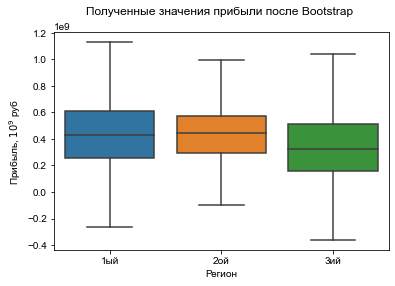

In [23]:
for_plot = pd.DataFrame({'1ый': values_0_series, '2ой': values_1_series, '3ий':values_2_series})
for_plot
ax = sns.boxplot(data = for_plot, showfliers=False)
sns.set_style("whitegrid")
ax.set_title(f'Полученные значения прибыли после Bootstrap \n')
ax.set_xlabel(xlabel='Регион')
ax.set_ylabel(ylabel='Прибыль, $10^9$ руб')
plt.show()

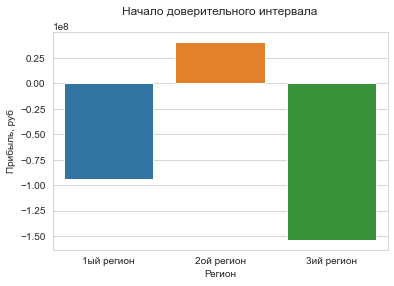

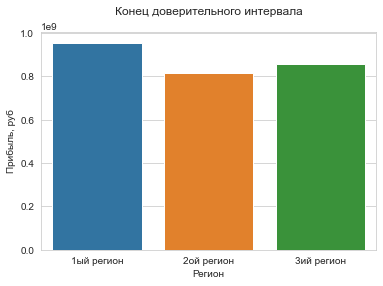

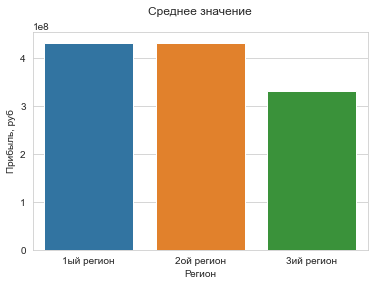

In [24]:
results = pd.DataFrame([quantiles_0, quantiles_1, quantiles_2])
results['mean'] = [mean_0, mean_1, mean_2]
results.columns = ['Начало доверительного интервала', 'Конец доверительного интервала', 'Среднее значение']

for i in ['Начало доверительного интервала', 'Конец доверительного интервала', 'Среднее значение']:
    ax = sns.barplot(data = results.reset_index(),
                     x='index', 
                     y=i,
                     )
    
    
    new_labels = ['1ый регион', '2ой регион', '3ий регион']

    ax.xaxis.set_ticklabels(new_labels)
    
    sns.set_style("whitegrid")

    ax.set_title(f'{i}\n')
    ax.set_xlabel(xlabel='Регион')
    ax.set_ylabel(ylabel='Прибыль, руб')
    plt.show()

In [25]:
for_plot

,1ый,2ой,3ий
0,5.872234e+08,5.405703e+08,1.791475e+08
1,2.812297e+08,6.988689e+08,6.777869e+08
2,1.196534e+08,2.294468e+08,5.640180e+08
3,2.595247e+08,2.094184e+08,3.375046e+08
4,7.216087e+08,1.502664e+08,-2.092664e+08
...,...,...,...
995,8.719876e+07,7.730111e+08,7.106375e+08
996,1.716440e+08,3.771092e+08,6.821807e+08
997,6.638818e+08,1.837299e+08,3.918588e+08
998,7.272724e+08,5.155038e+08,2.307903e+08


In [26]:
results

,Начало доверительного интервала,Конец доверительного интервала,Среднее значение
0,-9.407069e+07,9.550835e+08,4.316429e+08
1,4.025197e+07,8.146865e+08,4.322410e+08
2,-1.538878e+08,8.566424e+08,3.322105e+08


### Вывод

Только регион №2 удовлетворяет требованиям по рискам

## Выводы

Исходя из полученых результатов можно утверждать, что для разработки скважин нам подходит 2ой регион. Он отвечает требованиям по рискам и имеет наибольшее среднее значение прибыли.